**API Integration in Python**

I personally like using Python over R for API integrations. The `requests` module is very well documented and the returned object has more options for viewing the results than in R. Additionally, Python handles JSON object much better than R since it has `dict` data types and R does not. JSON objects are very commonly used when sending and receiving data with APIs so having built-in `dict` datatypes, which are the same format as JSON objects, is extremely useful. 

**The Github Job Posting Example**

Here is the code to make the same request in Python using the `requests` module. 

import packages:

In [1]:
import requests
import base64
import pandas as pd

In [2]:
response = requests.get("https://jobs.github.com/positions.json?description=api")

In Python, the response object returns the response and status code. We have a code 200, so the retrieval was a success.

In [3]:
response

<Response [200]>

The `requests` package has more options than the `httr` package in R. Since we have a code 200, we are ready to look at the content of the returned data. Requests returns the data in JSON (`response.json()`), text (`response.text`), or raw format (`response.content`). Having multiple options of datatype output is useful depending on how you want to use the data. Python's `dict` objects read JSON well so I will save the response content as a json object.

In [4]:
json_data = response.json()

Below is an example of how a `dict` and JSON object are structured. It is in the form of key and value pairs. For exampe, the key is `id` and the value is `b1008413-2d80-49cf-be28-f784d3978788`. This is the job ID for first job posting I printed below. In the second line, the key is `type` and the value is `Full Time`. This means that the job type for this first job posting is full time. Each value in this dataset has these keys and values.

In [27]:
json_data[3]

{'id': 'b1008413-2d80-49cf-be28-f784d3978788',
 'type': 'Full Time',
 'url': 'https://jobs.github.com/positions/b1008413-2d80-49cf-be28-f784d3978788',
 'created_at': 'Mon Mar 08 15:13:54 UTC 2021',
 'company': 'SovTech',
 'company_url': 'https://ltpx.nl/lubbp4y',
 'location': 'Johannesburg',
 'title': 'Javascript Software Engineer',
 'description': '<p><strong>Javascript Software Engineer</strong></p>\n<p>At SovTech we design, build, deploy and maintain innovative custom software that gives our clients the opportunity to start, run and grow world class businesses We are currently on the lookout for Software Engineers to join our team on a variety of projects that are kicking off over the next few months. Our teams are rapidly growing and we are looking for Developers that are passionate about building software for our World class clients. Firstly...We LOVE Javascript.</p>\n<p><strong>Job requirements</strong>\nWe are looking for Javascript Developers at ALL levels in all regions. Our h

The reason these `dict` structured data are so convenient in Python is because `Pandas` (and other modules) can easily convert them into dataframes. Each key becomes a column name and the values for the keys form a row for 1 entry. Below I printed the same job posting as above. We can see how the keys and values fall into columns and rows.

In [29]:
jobs_df = pd.DataFrame(json_data)
jobs_df[3:4]

,id,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo
3,b1008413-2d80-49cf-be28-f784d3978788,Full Time,https://jobs.github.com/positions/b1008413-2d8...,Mon Mar 08 15:13:54 UTC 2021,SovTech,https://ltpx.nl/lubbp4y,Johannesburg,Javascript Software Engineer,<p><strong>Javascript Software Engineer</stron...,"<p><a href=""https://ltpx.nl/zhMQLcU"">Click to ...",https://jobs.github.com/rails/active_storage/b...


**A more advanced example in Python using the Spotify API and access tokens**

For this example, we will use the Spotify Web API. I picked this API because it is easy to access (anyone with a Spotify account can get an access token) and the API resources and authorization flow are well documented. It also has a TON of interesting data - **potential final project data source!**


Information on the data available and how to retrieve it via the API is found here:
https://developer.spotify.com/documentation/web-api/reference/#reference-index

This example differs from the last as we now need to send additional data with our request, our authorization credentials. Authorization information is found here: https://developer.spotify.com/documentation/general/guides/authorization-guide/ 

We see in the documentation that we need to first create and store an access token from the API using the `POST` method. Once we create an access token we will use it in our `GET` request to get the data. We have to send our client_id and client_secret with the request in order to create an access token. The docs say that it has to be in the format `<base64 encoded client_id:client_secret>`.

The client id and client secret are given to you when creating an application account at https://developer.spotify.com/dashboard/login

*Note that I redacted my keys from the code so that they cannot be re-used*

In [8]:
secret_bytes = bytes(('{}:{}'.format(REDACTED_CLIENT_ID, REDACTED_CLIENT_SECRET)),'utf-8')
secret_enc = base64.b64encode(secret_bytes).decode('utf-8')

Now that we have encrypted our id and secret, we can build the `POST` request function `requests.post()`. The requests function takes the arguments `url` of the API endpoint, `headers` which contain more information about the resource to be fetched or, in this case, about the client requesting the resource, and `data` which also contains more information to send along with the request. In the `requests` module, the `headers` and `data` are sent in `dict` format (another reason why the built-in `dict` datatype makes requests so easy in Python).

`requests.post()` returns a response object that we will store into the variable `response_post`.

In [9]:
data = {'grant_type': 'client_credentials'}
headers = {'Authorization': 'Basic {}'.format(secret_enc)}
url = 'https://accounts.spotify.com/api/token'
response_post = requests.post(url, headers=headers, data=data)

***Building the request can be confusing - here is a cool cheat***

Sometimes it is difficult to figure out how to build the `request` function, what goes into `headers` and `data` arguments, etc.

Often times, well-documented APIs will have examples of the `cURL` requested function to use to make the request you want. `cURL` is the base language that makes the requests; packages and modules like `httr` in `R` and `requests` in `Python` basically make `cURL` accessible in these languages. Other packages for other languages are available as well.

*find the `cURL` command:* 

The Spotify documentation lists a `cURL` sample command, it is: `curl -X "POST" -H "Authorization: Basic ZjM4ZjAw...WY0MzE=" -d grant_type=client_credentials https://accounts.spotify.com/api/token`
It'll start with `curl` so you can do a CMD+F

*insert the command into this `cURL` converter:* 

https://onlinedevtools.in/curl 

Copy, paste, and select the language you want the output command to be. The output returns what to put into `data` and `header` arguments and how to run the `requests.post()` command - is the same as our code above. *but note that you have to enter your encrypted client ID and secret - do not copy the example ones as they are not valid.*

We should check that our request was successful and we receieved a `status_code = 200`, then we can save our access token in the variable `tk`. The token is stored in the content of the response.

In [10]:
if response_post.status_code == 200:
    tk = response_post.json()['access_token']
else:
    print('Something went wrong, status_code = {}'.format(response_post.status_code))

Now we can build our `GET` request to retrieve the Spotify data. There is a lot of data that we can get from the Spotify API (can read more about the data available here: https://developer.spotify.com/documentation/web-api/reference/#reference-index). 

I want to get information on audio features of some songs. More information on getting audio features for tracks here: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features


From the documentation, we see that we need to send our access token and Spotify track IDs of the songs that we want features on with our request. We have our access token from our `POST` request above. We read in the docs that each Spotify song has an ID associated with it, these are easily found on the Spotify app or web player (can google how to find the Spotify ID for a song).

The Spotify documentation provides an example of a `cURL` `GET` request for getting audio features. We can use it to create our `requests.get()` function by inserting it into the `cURL` converter explained above (https://onlinedevtools.in/curl).

*sample `cURL` request from Spotify documentation on getting audio features:*

`curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=4JpKVNYnVcJ8tuMKjAj50A%2C24JygzOLM0EmRQeGtFcIcG" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer ACCESS_TOKEN"`

To create the `requests.get()` fuction I will use some Spotify IDs from songs that I previously got via the Spotify API. We will also need our access token we got from our `POST` request and stored into `tk` above. I will store the `GET` response in the variable `response_get`.

In [11]:
# data I collected from the Spotify API previously and stored into a dict
# 'ID' = Spotify song ID 
# 'name' = song name
# 'artist' = song artist
songs = [
    {'id':'3HAgxyWGeJtIVabS2mTREt',
     'name':'Vagabond',
     'artist':'Caamp'
    },
    {'id':'75nZ4W6quZhI55LKiqCXWh',
     'name':'By and By',
     'artist':'Caamp'
    },
    {'id':'6255IIBwKySv6RYrOeHfQh',
     'name':'All the Debts I Owe',
     'artist':'Caamp'
    },
    {'id':'4KhBvLbRr58rHPF24bdL9Q',
     'name':'Officer of Love',
     'artist':'Caamp'
    },
    {'id':'0ESvfrHfNuAtkZp8SMJBOY',
     'name':'Strawberries',
     'artist':'Caamp'
    },
    {'id':'2pfAvgMoHLfialvMYn337d',
     'name':'No Sleep',
     'artist':'Caamp'
    },
    {'id':'2m9ryxnEcVoQNr22KRxe09',
     'name':'Channel 43',
     'artist':'Deadmau5'
    },
    {'id':'4ua0IepBEISCWwF8dTJvcU',
     'name':'Ghosts n Stuff',
     'artist':'Deadmau5'
    },
    {'id':'2nLgWMdYPO35GGpwX2xo23',
     'name':'Monophobia',
     'artist':'Deadmau5'
    },
    {'id':'5cr1Daz7Kv03CNb51I18sy',
     'name':'Arguru 2k19"',
     'artist':'Deadmau5'
    },
    {'id':'7oPqRSubaWcDb5F68aw3P6',
     'name':'The Veldt',
     'artist':'Deadmau5'
    },
    {'id':'5emTyRnoMTLc9G44RR6XIE',
     'name':'Bridged By A Lightwave',
     'artist':'Deadmau5'
    }
]

In [12]:
# get only ids from data above
ids = []
for i in range(0,len(songs)):
    ids.append(songs[i]['id'])

In [13]:
# format the IDs for the request function ('ID,ID,ID')
ids_fmt = ','.join([str(x) for x in ids])

In [14]:
# make request code
headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer {}'.format(tk),
}

params = (
    ('ids', ids_fmt),
)

response_get = requests.get('https://api.spotify.com/v1/audio-features', headers=headers, params=params)

Let's make sure we got a successful `status_code` and then store the JSON data into `audio_features`.

In [15]:
if response_get.status_code == 200:
    audio_features = response_get.json()['audio_features']
else:
    print('Something went wrong, status_code = {}'.format(response_get.status_code))

We can run `response_get.url` to see the url we formed in our request. We see that it is the same format as the `cURL` in the example request where the IDs are separated by `%` signs.

In [16]:
response_get.url

'https://api.spotify.com/v1/audio-features?ids=3HAgxyWGeJtIVabS2mTREt%2C75nZ4W6quZhI55LKiqCXWh%2C6255IIBwKySv6RYrOeHfQh%2C4KhBvLbRr58rHPF24bdL9Q%2C0ESvfrHfNuAtkZp8SMJBOY%2C2pfAvgMoHLfialvMYn337d%2C2m9ryxnEcVoQNr22KRxe09%2C4ua0IepBEISCWwF8dTJvcU%2C2nLgWMdYPO35GGpwX2xo23%2C5cr1Daz7Kv03CNb51I18sy%2C7oPqRSubaWcDb5F68aw3P6%2C5emTyRnoMTLc9G44RR6XIE'

In [17]:
audio_features_df = []
audio_features_rows = [i for i in audio_features if i]
for row in audio_features_rows:
    audio_features_df.append(row)

audio_features_df = pd.DataFrame(audio_features_df)

Here's what our data looks like:

In [18]:
audio_features_df[:3]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.571,0.399,4,-11.919,1,0.0364,0.766,0.014600,0.0926,0.611,141.922,audio_features,3HAgxyWGeJtIVabS2mTREt,spotify:track:3HAgxyWGeJtIVabS2mTREt,https://api.spotify.com/v1/tracks/3HAgxyWGeJtI...,https://api.spotify.com/v1/audio-analysis/3HAg...,129464,4
1,0.584,0.474,9,-7.981,1,0.0258,0.796,0.000003,0.1150,0.332,101.457,audio_features,75nZ4W6quZhI55LKiqCXWh,spotify:track:75nZ4W6quZhI55LKiqCXWh,https://api.spotify.com/v1/tracks/75nZ4W6quZhI...,https://api.spotify.com/v1/audio-analysis/75nZ...,280795,4
2,0.483,0.486,0,-11.062,1,0.0434,0.753,0.004790,0.1340,0.466,92.048,audio_features,6255IIBwKySv6RYrOeHfQh,spotify:track:6255IIBwKySv6RYrOeHfQh,https://api.spotify.com/v1/tracks/6255IIBwKySv...,https://api.spotify.com/v1/audio-analysis/6255...,193049,4


The columns are:

In [19]:
list(audio_features_df.columns)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

Details on what these numbers mean and how they are calculated are all found on Spotify's API documentation here: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features

Now we can plot some cool things with the data we recieved from the Spotify API. Let's first join in the initial data so we can have the artist and song name in the dataframe.

In [20]:
songs_df = pd.DataFrame(songs)

In [21]:
song_audio_features = pd.merge(
    audio_features_df,
    songs_df,
    on = ['id']
)

In [23]:
import seaborn as sns
import matplotlib.pylab as plt

Let's compare the average audio features of each artist across their songs. For some context, Caamp is an acoustic chill band and Deadmau5 is an electronic band.

In [24]:
grouped_artist = song_audio_features.groupby(by=['artist']).mean()

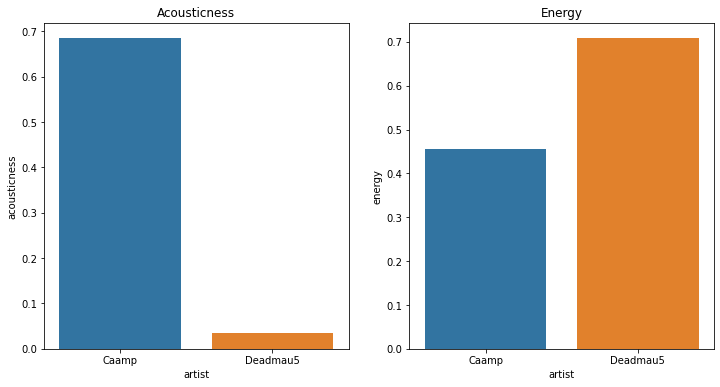

In [25]:
fig,ax = plt.subplots(1,2, figsize = (12,6));

sns.barplot(
    data = song_audio_features,
    y = 'acousticness',
    x = 'artist',
    ax = ax[0],
    ci = None
);
ax[0].set_title('Acousticness');

sns.barplot(
    data = song_audio_features,
    y = 'energy',
    x = 'artist',
    ax = ax[1],
    ci = None
);
ax[1].set_title('Energy');

Caamp's music is much more acoustic, as expected. Whereas Deadmau5's music has much more energy.